# 11-23-06 Geographic Visualization 

#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for Connecticut State 

country_geo = r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Data\Original Data\ct-town-boundaries.geojson'

In [4]:
# Code to look at the JSON file contents:

f = open(r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Data\Original Data\ct-town-boundaries.geojson',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.405966, 41.428202], [-73.378953, 41.420531], [-73.347714, 41.350244], [-73.424331, 41.335297], [-73.435022, 41.372407], [-73.401177, 41.402862], [-73.405966, 41.428202]]]}, 'properties': {'name': 'Bethel'}}
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.244169, 41.2266], [-73.201416, 41.229474], [-73.187272, 41.220534], [-73.169546, 41.222772], [-73.157637, 41.228385], [-73.162828, 41.220233], [-73.154456, 41.194804], [-73.154232, 41.183038], [-73.165756, 41.154305], [-73.179856, 41.152605], [-73.221058, 41.139904], [-73.232636, 41.14253], [-73.233878, 41.157186], [-73.22227, 41.168936], [-73.21914, 41.197767], [-73.244169, 41.2266]]]}, 'properties': {'name': 'Bridgeport'}}
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.426943, 41.463842], [-73.437636, 41.465741], [-73.44441, 41.477569], [-73.441467, 41.491302], [-73.386965, 41.514802], [-73.375264, 41.489202]

In [5]:
path = r'C:\Users\user\11-2023 Real Estate Sales Connecticut'

In [6]:
# Import the Connecticut Real Estate data

df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'realestate_sold.csv'), index_col= 0)

In [7]:
df.head()

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale,Sale_Amount_Zscore
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Non Residental,2021,9,-0.040765
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,2020,10,0.033112
2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,2021,3,-0.142855
3,200243,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,2021,4,0.356761
4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,2021,7,0.749010


In [8]:
df.shape

(995367, 12)

### 2. Data wrangling 

##### Choosing columns

In [9]:
# Selecting only the necessary columns
df_filtered=df[['Town','Sales Ratio']]

In [10]:
df_filtered.head()

,Town,Sales Ratio
0,Ansonia,0.4630
1,Ashford,0.5883
2,Avon,0.7248
3,Avon,0.6958
4,Avon,0.5957


In [11]:
df1=df_filtered.rename(columns={'Town':'TOWN'})

In [12]:
df1

,TOWN,Sales Ratio
0,Ansonia,0.463000
1,Ashford,0.588300
2,Avon,0.724800
3,Avon,0.695800
4,Avon,0.595700
...,...,...
997208,New London,1.137665
997209,Waterbury,0.898400
997210,Windsor Locks,0.578300
997211,Middletown,0.726300


### 3. Conduct consistency checks

In [13]:
# Check for missing values

df1.isnull().sum()

TOWN           0
Sales Ratio    0
dtype: int64

##### Duplicates check

In [14]:
dups = df1.duplicated()

In [15]:
dups.shape # no dups

(995367,)

##### Extreme values checks

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales Ratio', ylabel='Count'>

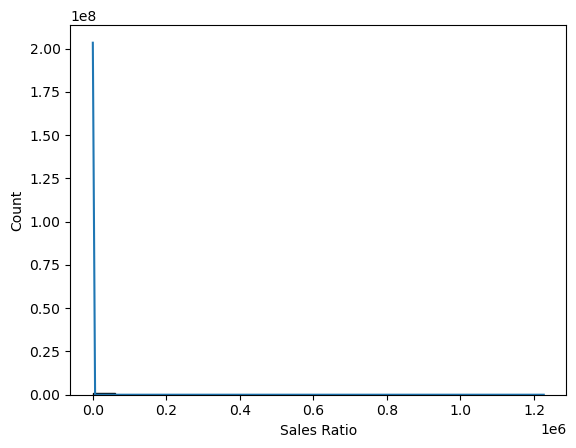

In [16]:
sns.histplot(df1['Sales Ratio'], bins=20, kde = True) # shows extreme values for 'Sales Ratio'

In [17]:
# Check how many extreme values

df1[df1['Sales Ratio'] >2]

,TOWN,Sales Ratio
197,Thompson,6.860000
199,Stonington,4.496842
213,Plymouth,3.479000
434,Litchfield,2.181800
484,Avon,13.020000
...,...,...
997030,Wolcott,4.816400
997056,Wilton,2.184400
997061,Montville,2.190000
997086,Stafford,4.053900


In [18]:
# Clean extreme values

df2 = df1[df1['Sales Ratio'] < 2] 
# 2 was picked because it is beyond belief any sale with price less than a half of Assessed Value belong to crises management actions and is out of market normal praxices !

In [19]:
df2.shape

(956893, 2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales Ratio', ylabel='Count'>

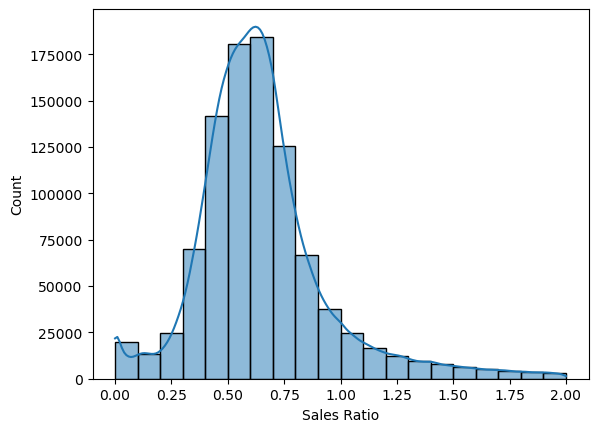

In [20]:
sns.histplot(df2['Sales Ratio'], bins=20, kde = True)  # shows extreme values for 'Sales Ratio'

In [21]:
df2.dtypes

TOWN            object
Sales Ratio    float64
dtype: object

### 4. Plotting a choropleth

In [22]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot=df2

In [23]:
data_to_plot.head()  

,TOWN,Sales Ratio
0,Ansonia,0.4630
1,Ashford,0.5883
2,Avon,0.7248
3,Avon,0.6958
4,Avon,0.5957


### Creating map by Sales Ratio

In [66]:

import folium
import pandas as pd
from folium.features import DivIcon

# Create a map with adjusted zoom level
map = folium.Map(location=[41.6032, -73.0877], zoom_start=9)

# Add the choropleth layer with town data
folium.Choropleth(
    geo_data=country_geo,
    data=data_to_plot,
    columns=['TOWN', 'Sales Ratio'],
    key_on='feature.properties.name',
    fill_color='YlGn',  # Using ColorBrewer code for yellow-green color gradient
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="Sales Ratio"
).add_to(map)

# Define town data as a pandas DataFrame with latitude, longitude, town_name, and Sales Ratio
town_data = pd.DataFrame([
    {'latitude': 41.5023, 'longitude': -72.9791, 'town_name': 'Prospect', 'font_color': 'blue', 'Average Sales Ratio': 0.91},
    {'latitude': 41.8314, 'longitude': -73.2197, 'town_name': 'Goshen', 'font_color': '#CF1020', 'Average Sales Ratio': 2.65}
])

# Add town names as custom markers on the map with colored fonts, increased font size, and displaying the Sales Ratio near the town name
for index, row in town_data.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html='<div style="font-size: 10pt; color: '+row['font_color']+'; font-weight: italic;">'+row['town_name']+' - Average Sales Ratio: '+str(row['Average Sales Ratio'])+'</div>'
        )
    ).add_to(map)

map


In [40]:
# List of chosen towns for which you need to calculate the average sales ratio
chosen_towns = ['Morris', 'Oxford', 'Prospect', 'Goshen', 'Danbury']

# Calculate and print the average "Sales Ratio" for each town
for town in chosen_towns:
    average_sales_ratio = df1[df1['TOWN'] == town]['Sales Ratio'].mean()
    print(f"The average sales ratio for {town} is: {average_sales_ratio}")


The average sales ratio for Morris is: 1.4053143324658683
The average sales ratio for Oxford is: 1.2302930292022216
The average sales ratio for Prospect is: 0.9071579986796691
The average sales ratio for Goshen is: 2.658470596950192
The average sales ratio for Danbury is: 1.455368831194871


In [58]:
# Save the map as an HTML file
html_file_path = r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Analytics\map.html'  
map.save(html_file_path)

### Towns avidenced by mapping Sales Ratio Statistic

In [67]:
# List of chosen towns for which I need to see the sales ratio statistics
chosen_towns = ['Morris', 'Oxford', 'Prospect', 'Goshen', 'Danbury', 'Hardfort']

# Calculate and print the statistics of the "Sales Ratio" for each chosen town
for town in chosen_towns:
    town_data = df1[df1['TOWN'] == town]['Sales Ratio']
    town_stats = town_data.describe()
    print(f"Statistics for {town}: \n{town_stats}\n")


Statistics for Morris: 
count    835.000000
mean       1.405314
std        6.033798
min        0.000000
25%        0.519388
50%        0.655600
75%        0.905247
max      139.275000
Name: Sales Ratio, dtype: float64

Statistics for Oxford: 
count    3961.000000
mean        1.230293
std        10.222378
min         0.000000
25%         0.471761
50%         0.635710
75%         0.768902
max       581.600000
Name: Sales Ratio, dtype: float64

Statistics for Prospect: 
count    2538.000000
mean        0.907158
std         3.985363
min         0.000000
25%         0.502485
50%         0.641738
75%         0.750940
max       165.795000
Name: Sales Ratio, dtype: float64

Statistics for Goshen: 
count    1566.000000
mean        2.658471
std        14.470248
min         0.000000
25%         0.466200
50%         0.645319
75%         0.853958
max       217.876667
Name: Sales Ratio, dtype: float64

Statistics for Danbury: 
count    20316.000000
mean         1.455369
std         85.695360
min    

### Sales Ratio Satandart Deviation by town

In [85]:
# Calculate the standard deviation for each town and store the results in the list
town_std_data = []
for town in df1['TOWN'].unique():
    town_data = df1[df1['TOWN'] == town]['Sales Ratio']
    town_std = town_data.std()
    town_std_data.append({'town': town, 'std': town_std})

# Create a DataFrame from the list of dictionaries
std_df = pd.DataFrame(town_std_data)

# Print the resulting DataFrame
print(std_df.to_string())


                 town           std
0             Ansonia      2.320627
1             Ashford      2.047290
2                Avon      8.527835
3              Berlin      9.978061
4             Bethany   7777.615491
5              Bethel      5.198943
6           Bethlehem      2.393078
7          Bloomfield      1.444636
8            Branford      2.844502
9             Bristol     74.746256
10         Brookfield   6868.807275
11             Canaan      2.373042
12             Canton      3.756868
13           Cheshire      3.477183
14            Chester      3.133088
15         Colchester      1.302513
16           Columbia      2.775467
17           Cornwall      6.228431
18           Coventry      2.665368
19           Cromwell     58.231420
20            Danbury     85.695360
21              Derby      1.190956
22           Eastford      8.131585
23        East Haddam      1.742876
24         East Haven   1168.934456
25         Farmington   2104.114390
26            Chaplin      0

### Creating map by STD of Sales Ratig

In [106]:
# Assuming that std of sales ratio shows Real Estate has been sold at too low price, it is interesting to see the regions where it happens:
m = folium.Map(location=[41.6032, -73.0877], zoom_start=9)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=std_df,
    columns=['town', 'std'],
    key_on='feature.properties.name',
    fill_color='YlGn',  # Using ColorBrewer code for yellow-green color gradient
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Sales Ratio STD'  # Update the legend name accordingly
).add_to(m)

folium.LayerControl().add_to(m)

m

In [107]:
# Save the map as an HTML file
html_file_path = r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Analytics\STDmap.html'  
map.save(html_file_path)

### Creating Map by Sale amount

In [95]:
# creating map by Sale amount
df2=df[['Town','Sale Amount']]

In [96]:
df2

,Town,Sale Amount
0,Ansonia,325000.0
1,Ashford,430000.0
2,Avon,179900.0
3,Avon,890000.0
4,Avon,1447500.0
...,...,...
997208,New London,53100.0
997209,Waterbury,76000.0
997210,Windsor Locks,210000.0
997211,Middletown,280000.0


In [101]:
# Creating the map to understand the price level in different towns:
m = folium.Map(location=[41.6032, -73.0877], zoom_start=9)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=df2,
    columns=['Town', 'Sale Amount'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',  
# Using ColorBrewer code:
# "PuRd" (Purple-Red)
# "YlOrBr" (Yellow-Orange-Brown)
#  "BuGn" (Blue-Green)
#  "PuBuGn" (Purple-Blue-Green)
#  "RdPu" (Red-Purple)
#  "YlGnBu" (Yellow-Green-Blue)
#  "OrRd" (Orange-Red)
# "GnBu" (Green-Blue)

 fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Sale Amount'  # Update the legend name accordingly
).add_to(m)

folium.LayerControl().add_to(m)

m

In [108]:
# Save the map as an HTML file
html_file_path = r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Analytics\Sale_Amount_map.html'  
map.save(html_file_path)

In [104]:
# List of chosen towns for which I need to see the sales ratio statistics
chosen_towns = ['New Fairfield','Branford', 'Oxford', 'Milford']

# Calculate and print the statistics of the "Sales Ratio" for each chosen town
for town in chosen_towns:
    town_data = df2[df2['Town'] == town]['Sale Amount']
    town_stats = town_data.describe()
    print(f"Statistics for {town}: \n{town_stats}\n")


Statistics for New Fairfield: 
count    4.140000e+03
mean     3.759500e+05
std      2.922195e+05
min      1.000000e+00
25%      2.200000e+05
50%      3.250000e+05
75%      4.536250e+05
max      4.295000e+06
Name: Sale Amount, dtype: float64

Statistics for Branford: 
count    8.712000e+03
mean     3.094333e+05
std      4.999236e+05
min      1.000000e+02
25%      1.495000e+05
50%      2.245000e+05
75%      3.470000e+05
max      2.150000e+07
Name: Sale Amount, dtype: float64

Statistics for Oxford: 
count    3.961000e+03
mean     3.518986e+05
std      3.147780e+05
min      1.000000e+00
25%      2.250000e+05
50%      3.492020e+05
75%      4.340210e+05
max      7.056000e+06
Name: Sale Amount, dtype: float64

Statistics for Milford: 
count    1.774200e+04
mean     3.463171e+05
std      8.163561e+05
min      1.100000e+03
25%      1.830000e+05
50%      2.650000e+05
75%      3.630000e+05
max      5.050000e+07
Name: Sale Amount, dtype: float64

